In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
building_info = pd.read_csv('./data/building_info.csv')

In [3]:
train_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [4]:
building_info

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


In [5]:
test_df

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%)
0,1_20220825 00,1,20220825 00,23.5,0.0,2.2,72
1,1_20220825 01,1,20220825 01,23.0,0.0,0.9,72
2,1_20220825 02,1,20220825 02,22.7,0.0,1.5,75
3,1_20220825 03,1,20220825 03,22.1,0.0,1.3,78
4,1_20220825 04,1,20220825 04,21.8,0.0,1.0,77
...,...,...,...,...,...,...,...
16795,100_20220831 19,100,20220831 19,22.5,0.0,0.9,84
16796,100_20220831 20,100,20220831 20,20.7,0.0,0.4,95
16797,100_20220831 21,100,20220831 21,20.2,0.0,0.4,98
16798,100_20220831 22,100,20220831 22,20.1,0.0,1.1,97


In [6]:
train_df = train_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
train_df.drop('num_date_time', axis=1, inplace=True)

In [7]:
train_df.head(5)

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [8]:
test_df = test_df.rename(columns={
    '건물번호': 'building_number',
    '일시': 'date_time',
    '기온(C)': 'temperature',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption'
})
test_df.drop('num_date_time', axis = 1, inplace=True)

In [9]:
test_df.head(5)

,building_number,date_time,temperature,rainfall,windspeed,humidity
0,1,20220825 00,23.5,0.0,2.2,72
1,1,20220825 01,23.0,0.0,0.9,72
2,1,20220825 02,22.7,0.0,1.5,75
3,1,20220825 03,22.1,0.0,1.3,78
4,1,20220825 04,21.8,0.0,1.0,77


In [10]:
building_info = building_info.rename(columns={
    '건물번호': 'building_number',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_capacity',
    'ESS저장용량(kWh)': 'ess_capacity',
    'PCS용량(kW)': 'pcs_capacity'
})


In [11]:
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}

building_info['building_type'] = building_info['building_type'].replace(translation_dict)

In [12]:
building_info.head()

,building_number,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,Other Buildings,110634.00,39570.00,-,-,-
1,2,Other Buildings,122233.47,99000.00,-,-,-
2,3,Other Buildings,171243.00,113950.00,40,-,-
3,4,Other Buildings,74312.98,34419.62,60,-,-
4,5,Other Buildings,205884.00,150000.00,-,2557,1000


In [13]:
train_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [14]:
train_df = pd.merge(train_df, building_info, on='building_number', how='left')
test_df = pd.merge(test_df, building_info, on='building_number', how='left')

In [15]:
train_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-


In [16]:
test_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,20220825 00,23.5,0.0,2.2,72,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220825 01,23.0,0.0,0.9,72,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220825 02,22.7,0.0,1.5,75,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220825 03,22.1,0.0,1.3,78,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220825 04,21.8,0.0,1.0,77,Other Buildings,110634.0,39570.0,-,-,-


In [17]:
len(train_df)

204000

In [18]:
train_df.isna().sum()

building_number              0
date_time                    0
temperature                  0
rainfall                160069
windspeed                   19
humidity                     9
sunshine                 75182
solar_radiation          87913
power_consumption            0
building_type                0
total_area                   0
cooling_area                 0
solar_power_capacity         0
ess_capacity                 0
pcs_capacity                 0
dtype: int64

In [19]:
test_df.isna().sum()

building_number         0
date_time               0
temperature             0
rainfall                0
windspeed               0
humidity                0
building_type           0
total_area              0
cooling_area            0
solar_power_capacity    0
ess_capacity            0
pcs_capacity            0
dtype: int64

In [20]:
print(len(train_df[train_df['solar_power_capacity'] == '-']))
print(len(train_df[train_df['ess_capacity'] == '-']))
print(len(train_df[train_df['pcs_capacity'] == '-']))

130560
193800
193800


In [21]:
train_df[train_df['solar_power_capacity'] == '-'].head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,solar_power_capacity,ess_capacity,pcs_capacity
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0,-,-,-


In [22]:
train_df = train_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)
test_df = test_df.drop(['solar_power_capacity', 'ess_capacity', 'pcs_capacity'], axis=1)

In [23]:
train_df.head()

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.0,39570.0
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.0,39570.0
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.0,39570.0
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.0,39570.0
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.0,39570.0


In [24]:
train_df['date_time']

0         20220601 00
1         20220601 01
2         20220601 02
3         20220601 03
4         20220601 04
             ...     
203995    20220824 19
203996    20220824 20
203997    20220824 21
203998    20220824 22
203999    20220824 23
Name: date_time, Length: 204000, dtype: object

In [25]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y%m%d %H')

# date time feature 생성
train_df['hour'] = train_df['date_time'].dt.hour
train_df['day'] = train_df['date_time'].dt.day
train_df['month'] = train_df['date_time'].dt.month
train_df['year'] = train_df['date_time'].dt.year

In [26]:
train_df

,building_number,date_time,temperature,rainfall,windspeed,humidity,sunshine,solar_radiation,power_consumption,building_type,total_area,cooling_area,hour,day,month,year
0,1,2022-06-01 00:00:00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,Other Buildings,110634.00,39570.00,0,1,6,2022
1,1,2022-06-01 01:00:00,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,Other Buildings,110634.00,39570.00,1,1,6,2022
2,1,2022-06-01 02:00:00,17.7,NaN,1.5,45.0,NaN,NaN,974.88,Other Buildings,110634.00,39570.00,2,1,6,2022
3,1,2022-06-01 03:00:00,16.7,NaN,1.4,48.0,NaN,NaN,953.76,Other Buildings,110634.00,39570.00,3,1,6,2022
4,1,2022-06-01 04:00:00,18.4,NaN,2.8,43.0,NaN,NaN,986.40,Other Buildings,110634.00,39570.00,4,1,6,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,2022-08-24 19:00:00,23.1,NaN,0.9,86.0,0.5,NaN,881.04,Hotel and Resort,57497.84,40035.23,19,24,8,2022
203996,100,2022-08-24 20:00:00,22.4,NaN,1.3,86.0,0.0,NaN,798.96,Hotel and Resort,57497.84,40035.23,20,24,8,2022
203997,100,2022-08-24 21:00:00,21.3,NaN,1.0,92.0,NaN,NaN,825.12,Hotel and Resort,57497.84,40035.23,21,24,8,2022
203998,100,2022-08-24 22:00:00,21.0,NaN,0.3,94.0,NaN,NaN,640.08,Hotel and Resort,57497.84,40035.23,22,24,8,2022


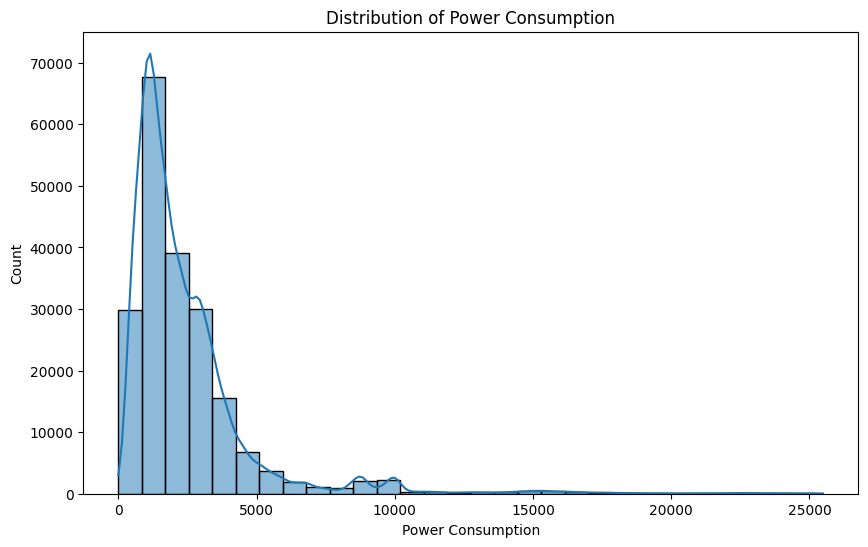

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['power_consumption'], bins = 30, kde=True)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Count')
plt.show()

In [28]:
# 연 기준 일 평균 소비전력
train_df['day_of_year'] = train_df['date_time'].dt.dayofyear    # 연 기준 몇일째
mean_power_by_day_of_year = train_df.groupby('day_of_year')['power_consumption'].mean()

# 연 기준 시간 평균 소비전력
train_df['hour_of_year'] = train_df['date_time'].dt.hour + (train_df['date_time'].dt.dayofyear - 1) * 24
mean_power_by_hour_of_year = train_df.groupby('hour_of_year')['power_consumption'].mean()

# 연 기준 월 평균 소비전력
mean_power_by_month = train_df.groupby('month')['power_consumption'].mean()

# 일 기준 시간 평균 소비전력
mean_power_by_hour = train_df.groupby('hour')['power_consumption'].mean()

# 월 기준 시간 평균 소비전력
mean_power_by_day = train_df.groupby('day')['power_consumption'].mean()

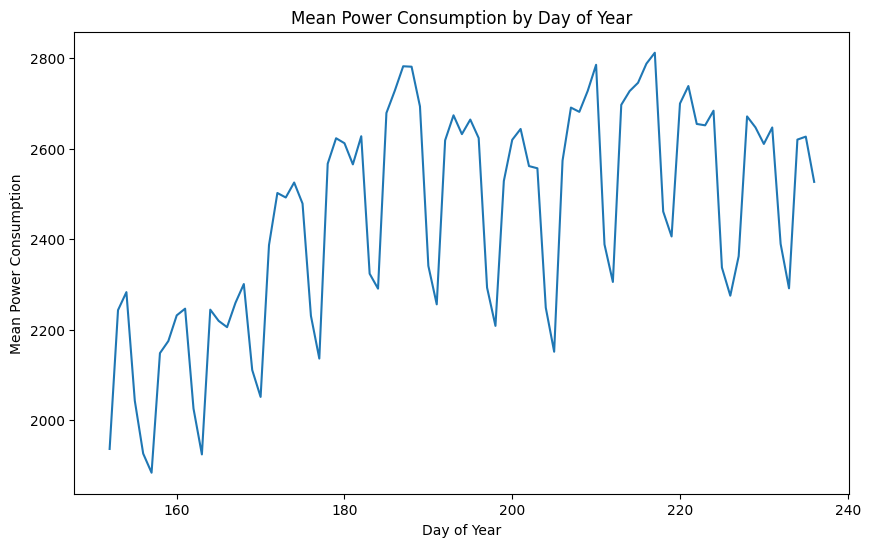

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = mean_power_by_day_of_year.index, y = mean_power_by_day_of_year.values)
plt.title('Mean Power Consumption by Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Mean Power Consumption')
plt.show()

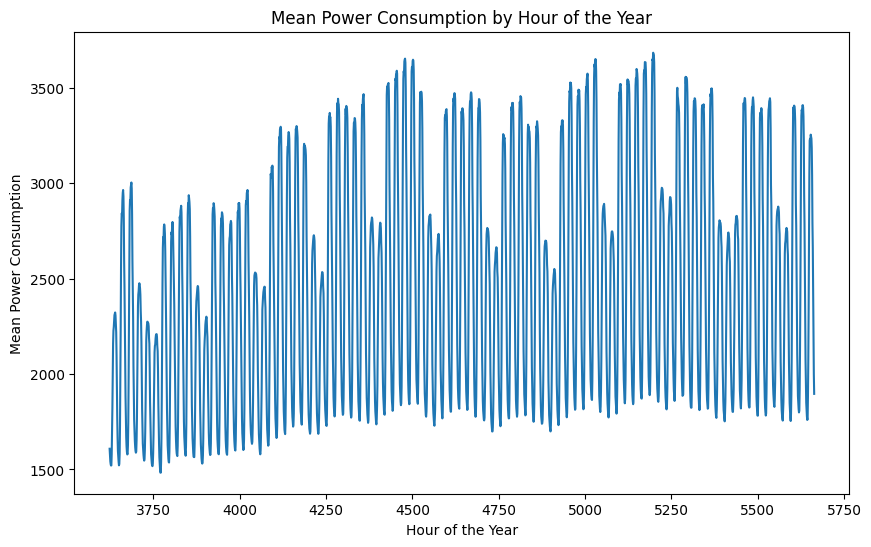

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_power_by_hour_of_year.index, y=mean_power_by_hour_of_year.values)
plt.title('Mean Power Consumption by Hour of the Year')
plt.xlabel('Hour of the Year')
plt.ylabel('Mean Power Consumption')
plt.show()

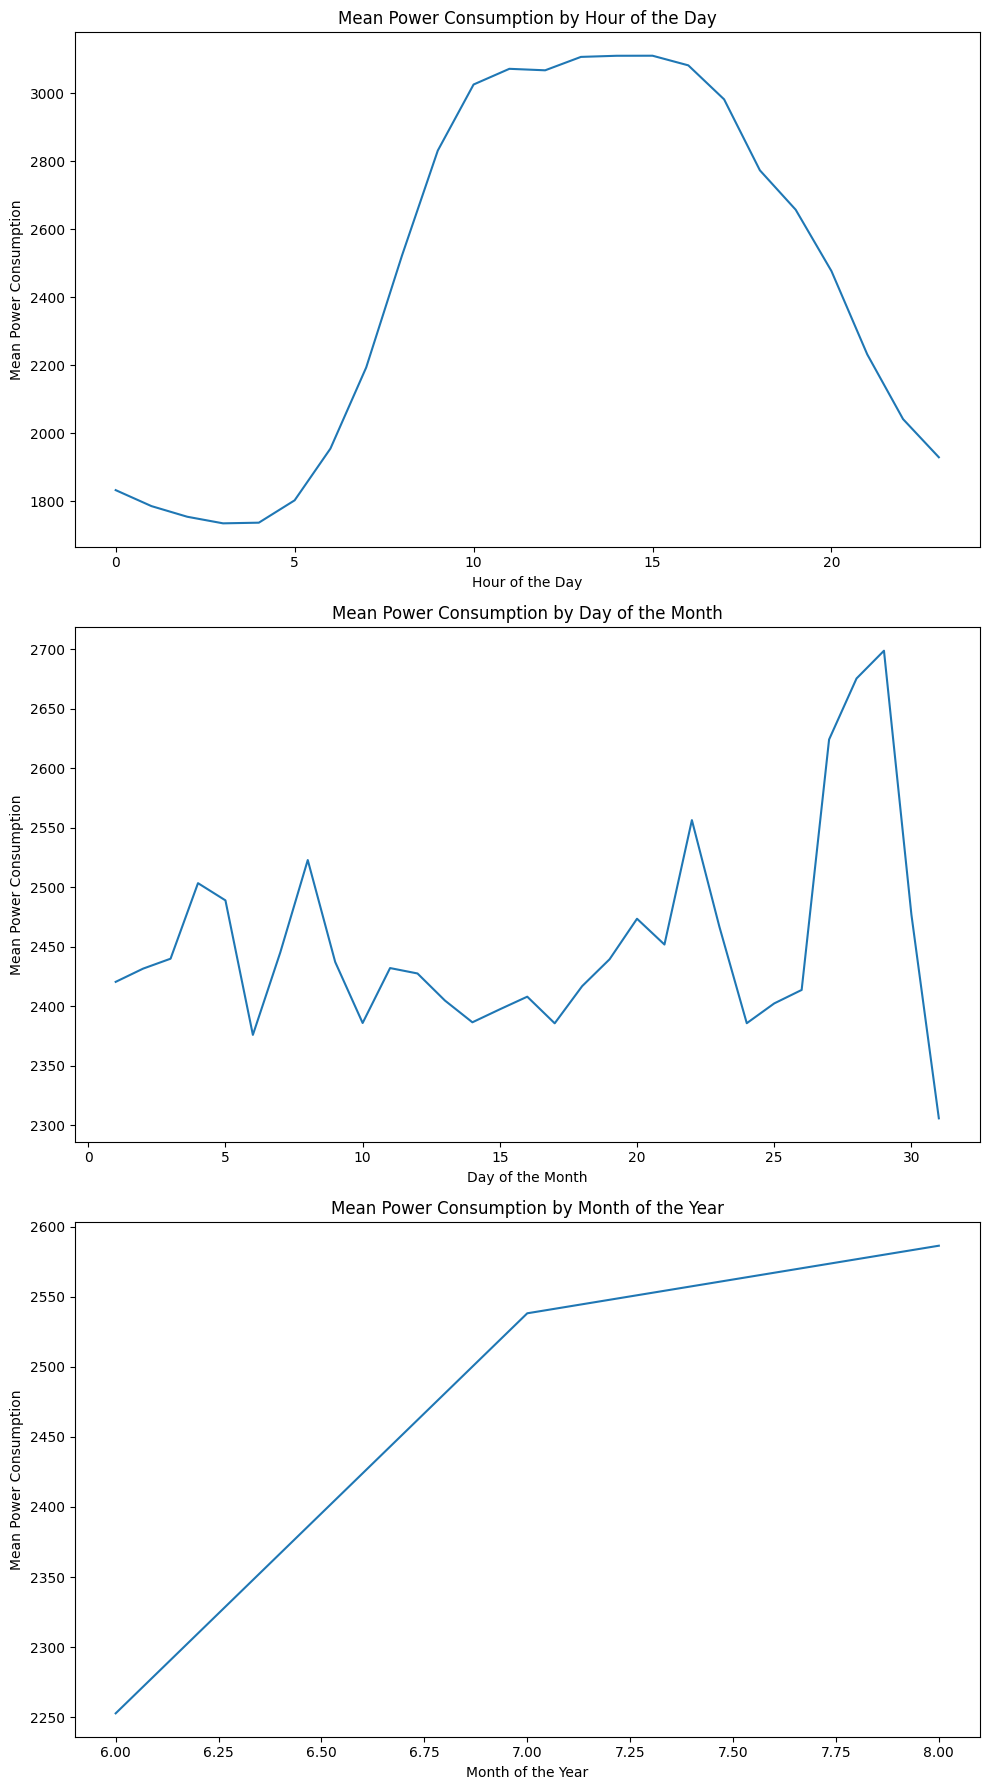

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot mean power consumption by hour of the day
sns.lineplot(x=mean_power_by_hour.index, y=mean_power_by_hour.values, ax=axs[0])
axs[0].set_title('Mean Power Consumption by Hour of the Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Mean Power Consumption')

# Plot mean power consumption by day of the month
sns.lineplot(x=mean_power_by_day.index, y=mean_power_by_day.values, ax=axs[1])
axs[1].set_title('Mean Power Consumption by Day of the Month')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Mean Power Consumption')

# 년기준 월평균 소비전력
sns.lineplot(x=mean_power_by_month.index, y=mean_power_by_month.values, ax=axs[2])
axs[2].set_title('Mean Power Consumption by Month of the Year')
axs[2].set_xlabel('Month of the Year')
axs[2].set_ylabel('Mean Power Consumption')

plt.tight_layout()
plt.show()

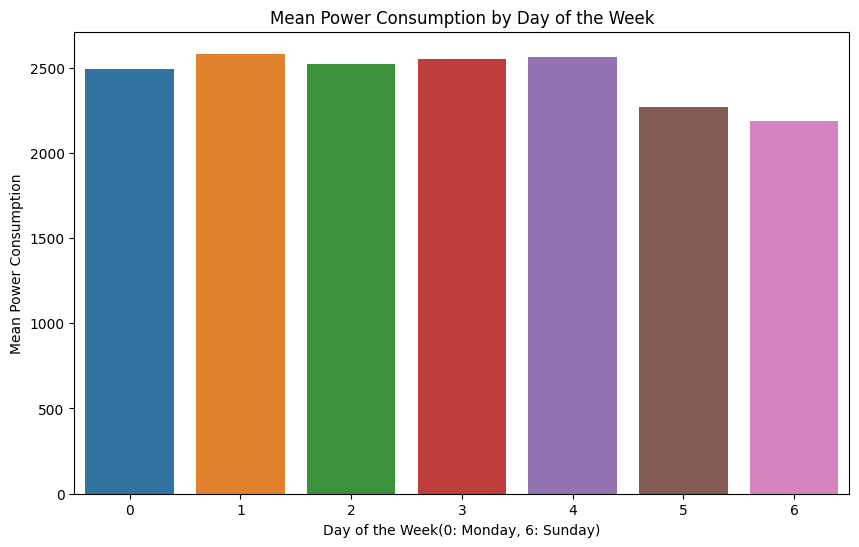

In [32]:
train_df['day_of_week'] = train_df['date_time'].dt.dayofweek

# 요일별 전력 평균
mean_power_by_day_of_week = train_df.groupby('day_of_week')['power_consumption'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_power_by_day_of_week.index, y=mean_power_by_day_of_week.values)
plt.title('Mean Power Consumption by Day of the Week')
plt.xlabel('Day of the Week(0: Monday, 6: Sunday)')
plt.ylabel('Mean Power Consumption')
plt.show()

In [35]:
train_df['power_consumption'].describe()

count    204000.000000
mean       2451.036462
std        2440.648858
min           0.000000
25%        1085.760000
50%        1766.400000
75%        2970.000000
max       25488.400000
Name: power_consumption, dtype: float64

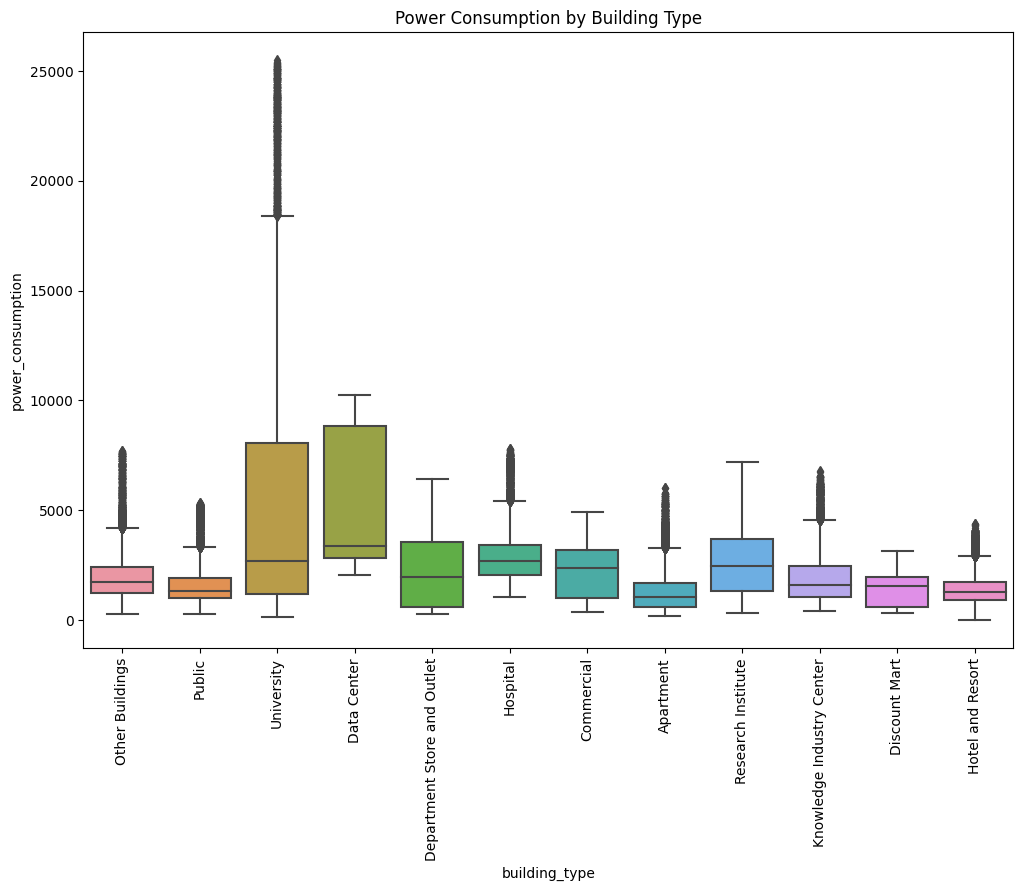

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'building_type', y = 'power_consumption', data = train_df)
plt.title('Power Consumption by Building Type')
plt.xticks(rotation=90)
plt.show()

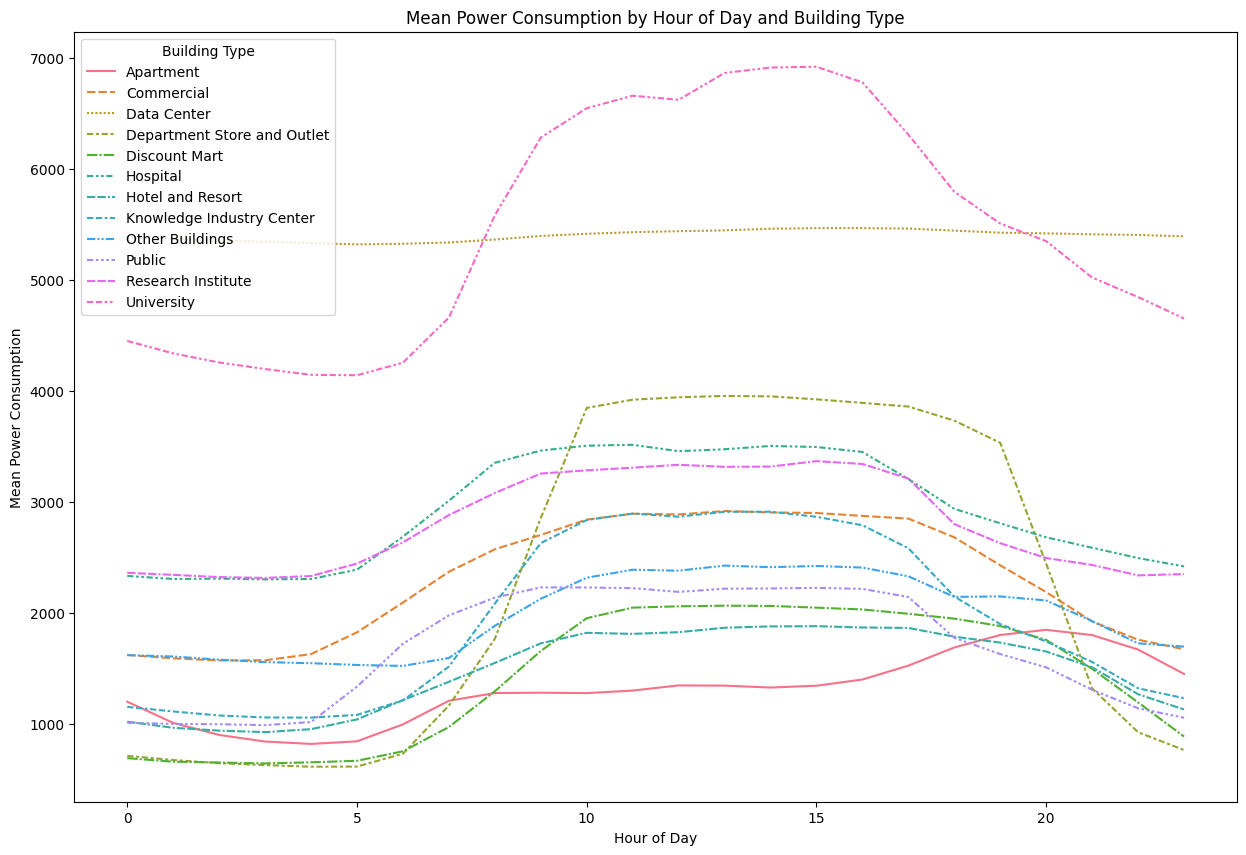

In [36]:
mean_power_by_hour_building = train_df.groupby(['hour', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df = mean_power_by_hour_building.pivot(index='hour', columns='building_type', values='power_consumption')

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df)
plt.title('Mean Power Consumption by Hour of Day and Building Type')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

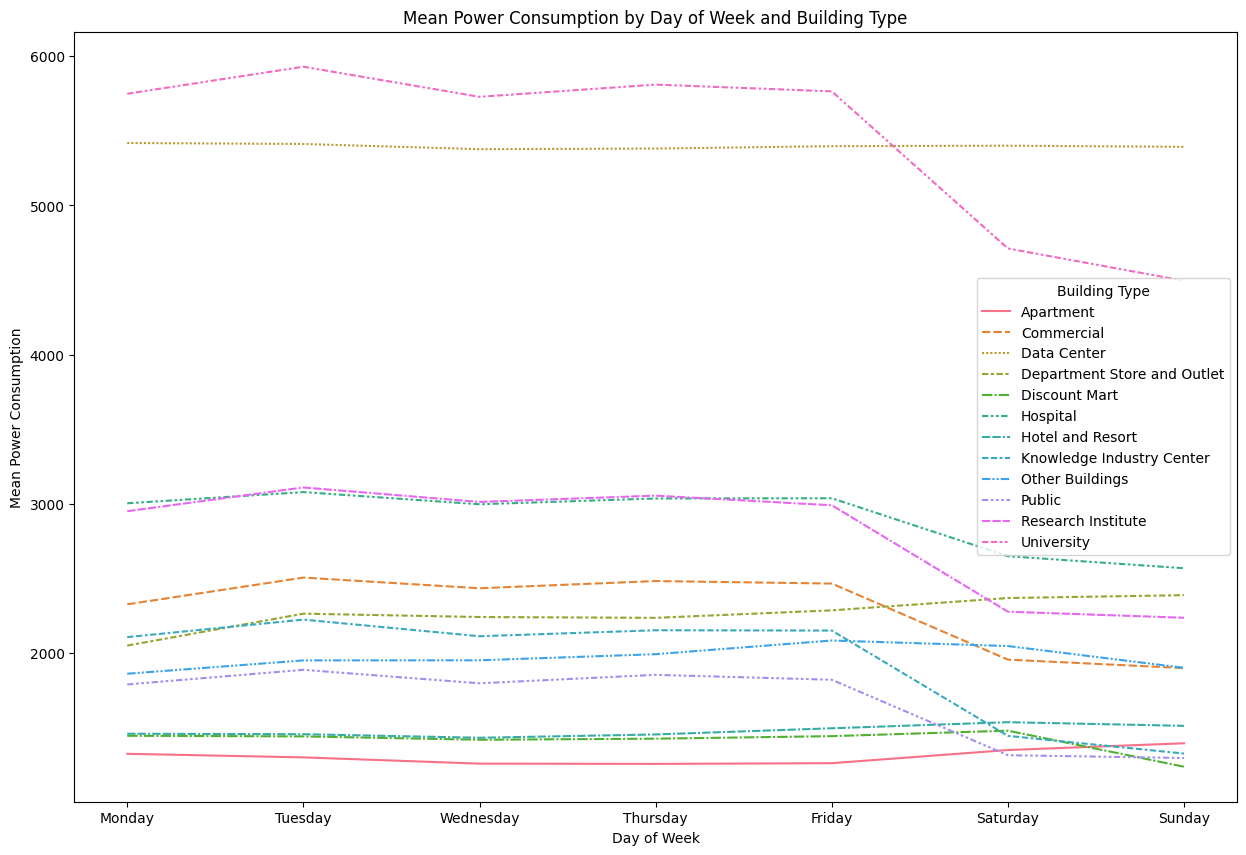

In [37]:
mean_power_by_day_building = train_df.groupby(['day_of_week', 'building_type'])['power_consumption'].mean().reset_index()

pivot_df_day = mean_power_by_day_building.pivot(index='day_of_week', columns='building_type', values='power_consumption')

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df_day.index = day_names

plt.figure(figsize=(15, 10))
sns.lineplot(data=pivot_df_day)
plt.title('Mean Power Consumption by Day of Week and Building Type')
plt.xlabel('Day of Week')
plt.ylabel('Mean Power Consumption')
plt.legend(title='Building Type')
plt.show()

In [39]:
train_df.isna().sum()

building_number           0
date_time                 0
temperature               0
rainfall             160069
windspeed                19
humidity                  9
sunshine              75182
solar_radiation       87913
power_consumption         0
building_type             0
total_area                0
cooling_area              0
hour                      0
day                       0
month                     0
year                      0
day_of_year               0
hour_of_year              0
day_of_week               0
dtype: int64